# Customer Churn Prediction

Aim: The aim of customer churn prediction is to develop a predictive model that can accurately forecast which customers 
are likely to leave a business or discontinue using its products or services. By analyzing historical data and 
identifying patterns and indicators associated with customer churn, businesses can proactively implement retention 
strategies to mitigate churn and maintain customer loyalty, ultimately leading to improved profitability and 
sustainable growth.

# Load libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# column summary

Gender:  Categorical variable representing the gender of the customer.

Age (numeric): Numeric variable representing the age of the customer.

Tenure (numeric): Numeric variable representing the duration of the customer's tenure or subscription.

PhoneService: Categorical variable indicating whether the customer subscribes to phone service.

MultipleLines: Categorical variable indicating whether the customer has multiple phone lines.

InternetService: Categorical variable indicating the type of internet service subscribed by the customer.

OnlineSecurity: Categorical variable indicating whether the customer has online security service.

OnlineBackup: Categorical variable indicating whether the customer has online backup service.

DeviceProtection: Categorical variable indicating whether the customer has device protection service.

StreamingTV: Categorical variable indicating whether the customer has streaming TV service.

StreamingMovies: Categorical variable indicating whether the customer has streaming movies service.

Contract: Categorical variable indicating the type of contract the customer is on (e.g., month-to-month, yearly).

MonthlyCharges (numeric): Numeric variable representing the monthly charges incurred by the customer.

TotalCharges (numeric): Numeric variable representing the total charges incurred by the customer.

Churn: Binary variable indicating whether the customer has churned (cancelled their subscription).

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,cust_id,gender,age,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,7590,Female,60,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,29.85,29.85,No
1,5575,Male,52,34,Yes,No,DSL,Yes,No,Yes,No,No,One year,56.95,1889.5,No
2,3668,Male,48,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,53.85,108.15,Yes
3,7795,Male,41,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,42.3,1840.75,No
4,9237,Female,56,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,6840,Male,51,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,84.8,1990.5,No
7037,2234,Female,65,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,One year,103.2,7362.9,No
7038,4801,Female,63,11,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,29.6,346.45,No
7039,8361,Male,47,4,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,74.4,306.6,Yes


#  Exploratory Data Analysis

In [3]:
df.head()

,cust_id,gender,age,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,7590,Female,60,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,29.85,29.85,No
1,5575,Male,52,34,Yes,No,DSL,Yes,No,Yes,No,No,One year,56.95,1889.5,No
2,3668,Male,48,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,53.85,108.15,Yes
3,7795,Male,41,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,42.3,1840.75,No
4,9237,Female,56,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,70.7,151.65,Yes


In [4]:
df.tail()

,cust_id,gender,age,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
7036,6840,Male,51,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,84.8,1990.5,No
7037,2234,Female,65,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,One year,103.2,7362.9,No
7038,4801,Female,63,11,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,29.6,346.45,No
7039,8361,Male,47,4,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,74.4,306.6,Yes
7040,3186,Male,50,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Two year,105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cust_id           7041 non-null   int64 
 1   gender            7041 non-null   object
 2   age               7041 non-null   int64 
 3   tenure            7041 non-null   int64 
 4   PhoneService      7041 non-null   object
 5   MultipleLines     7041 non-null   object
 6   InternetService   7041 non-null   object
 7   OnlineSecurity    7041 non-null   object
 8   OnlineBackup      7041 non-null   object
 9   DeviceProtection  7041 non-null   object
 10  StreamingTV       7041 non-null   object
 11  StreamingMovies   7041 non-null   object
 12  Contract          7041 non-null   object
 13  MonthlyCharges    7041 non-null   object
 14  TotalCharges      7041 non-null   object
 15  Churn             7041 non-null   object
dtypes: int64(3), object(13)
memory usage: 880.2+ KB


In [6]:
df.isnull().sum()

cust_id             0
gender              0
age                 0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# dropping cust_id column as it has nothing to do with the analysis of churn

In [7]:
df = df.drop(['cust_id'], axis = 1)
df.head()

,gender,age,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,60,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,29.85,29.85,No
1,Male,52,34,Yes,No,DSL,Yes,No,Yes,No,No,One year,56.95,1889.5,No
2,Male,48,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,41,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,42.3,1840.75,No
4,Female,56,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,70.7,151.65,Yes


In [8]:
df["MonthlyCharges"].value_counts()

20.05    60
19.85    45
?        45
19.95    44
19.9     44
         ..
87.8      1
43.65     1
107.6     1
112.4     1
21.15     1
Name: MonthlyCharges, Length: 1581, dtype: int64

In [9]:
df["MonthlyCharges"].replace("?",np.nan,inplace=True)
df

,gender,age,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,60,1,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,29.85,29.85,No
1,Male,52,34,Yes,No,DSL,Yes,No,Yes,No,No,One year,56.95,1889.5,No
2,Male,48,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,41,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,42.3,1840.75,No
4,Female,56,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,Male,51,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,84.8,1990.5,No
7037,Female,65,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,One year,103.2,7362.9,No
7038,Female,63,11,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,29.6,346.45,No
7039,Male,47,4,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,74.4,306.6,Yes


In [10]:
df["MonthlyCharges"]=df["MonthlyCharges"].astype(float) # To convert into Float data type

In [11]:
df["MonthlyCharges"].mean()

64.70599628359065

In [12]:
MonthlyCharges_mean=df["MonthlyCharges"].mean()
df["MonthlyCharges"]=df["MonthlyCharges"].fillna(MonthlyCharges_mean)

In [13]:
df["MonthlyCharges"].value_counts()

20.050000     60
19.850000     45
64.705996     45
19.950000     44
19.900000     44
              ..
87.800000      1
43.650000      1
107.600000     1
112.400000     1
21.150000      1
Name: MonthlyCharges, Length: 1581, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7041 non-null   object 
 1   age               7041 non-null   int64  
 2   tenure            7041 non-null   int64  
 3   PhoneService      7041 non-null   object 
 4   MultipleLines     7041 non-null   object 
 5   InternetService   7041 non-null   object 
 6   OnlineSecurity    7041 non-null   object 
 7   OnlineBackup      7041 non-null   object 
 8   DeviceProtection  7041 non-null   object 
 9   StreamingTV       7041 non-null   object 
 10  StreamingMovies   7041 non-null   object 
 11  Contract          7041 non-null   object 
 12  MonthlyCharges    7041 non-null   float64
 13  TotalCharges      7041 non-null   object 
 14  Churn             7041 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 825.2+ KB


In [15]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
19.65      8
19.9       8
          ..
203.95     1
6849.4     1
692.35     1
130.15     1
6844.5     1
Name: TotalCharges, Length: 6530, dtype: int64

In [16]:
df["TotalCharges"].replace(" ",np.nan,inplace=True)

In [17]:
df["TotalCharges"]=df["TotalCharges"].astype(float) # To convert into Float data type

In [18]:
df["TotalCharges"].mean()

2283.4417354196335

In [19]:
TotalCharges_mean=df["TotalCharges"].mean()
df["TotalCharges"]=df["TotalCharges"].fillna(TotalCharges_mean)

In [20]:
df["TotalCharges"].value_counts()

2283.441735    11
20.200000      11
19.750000       9
19.650000       8
19.900000       8
               ..
203.950000      1
6849.400000     1
692.350000      1
130.150000      1
6844.500000     1
Name: TotalCharges, Length: 6530, dtype: int64

In [21]:
df.isnull().sum()

gender              0
age                 0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7041 non-null   object 
 1   age               7041 non-null   int64  
 2   tenure            7041 non-null   int64  
 3   PhoneService      7041 non-null   object 
 4   MultipleLines     7041 non-null   object 
 5   InternetService   7041 non-null   object 
 6   OnlineSecurity    7041 non-null   object 
 7   OnlineBackup      7041 non-null   object 
 8   DeviceProtection  7041 non-null   object 
 9   StreamingTV       7041 non-null   object 
 10  StreamingMovies   7041 non-null   object 
 11  Contract          7041 non-null   object 
 12  MonthlyCharges    7041 non-null   float64
 13  TotalCharges      7041 non-null   float64
 14  Churn             7041 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 825.2+ KB


In [23]:
df.describe()

,age,tenure,MonthlyCharges,TotalCharges
count,7041.000000,7041.000000,7041.000000,7041.000000
mean,43.170856,32.385883,64.705996,2283.441735
std,15.908356,24.550026,29.977707,2265.116437
min,16.000000,1.000000,18.250000,18.800000
25%,29.000000,9.000000,35.750000,402.500000
50%,44.000000,29.000000,70.200000,1400.550000
75%,57.000000,55.000000,89.750000,3789.200000
max,70.000000,72.000000,118.750000,8684.800000


# Visualization

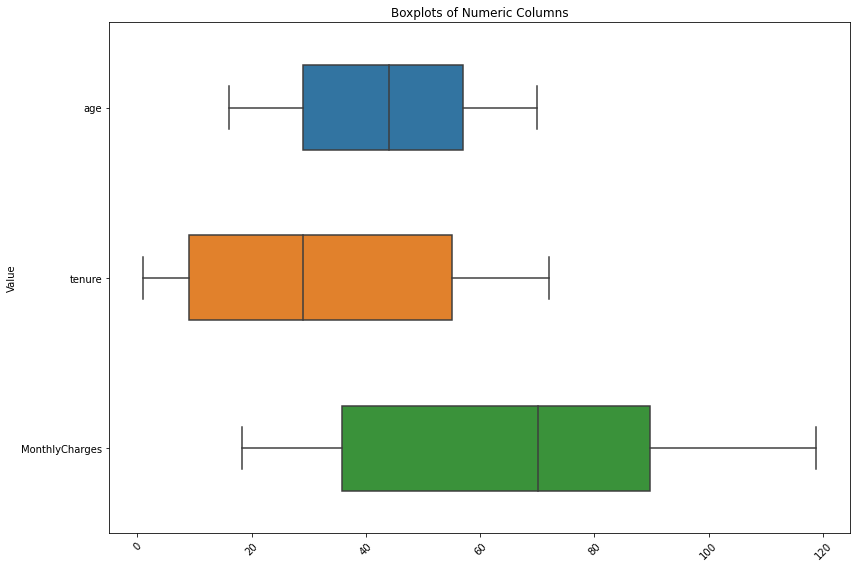

In [24]:
# Selecting numeric columns
numeric_cols = ['age', 'tenure', 'MonthlyCharges']

# Creating boxplots for all numeric columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols], orient='h', width=0.5)
plt.title('Boxplots of Numeric Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


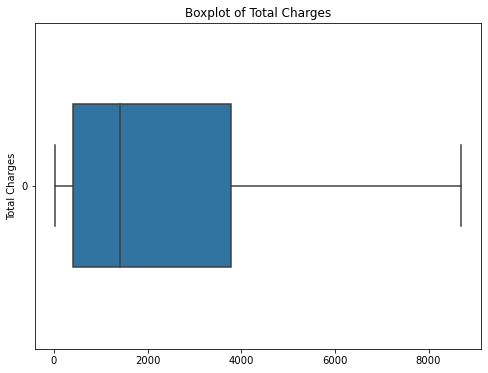

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['TotalCharges'], orient='h', width=0.5)
plt.title('Boxplot of Total Charges')
plt.ylabel('Total Charges')
plt.show()

Above Boxplots provide a concise visual summary of the distribution of numeric data, offering insights into central tendency,
spread and outliers in a single glance. They help identify the median, spread of the data around it, presence 
of skewness based on the lengths of the whiskers, and any outliers lying beyond the whiskers. With boxplots, comparisons 
between different variables become straightforward, enabling quick identification of patterns, anomalies, and potential 
data issues.
And as we can see there are no outliers in above boxplots

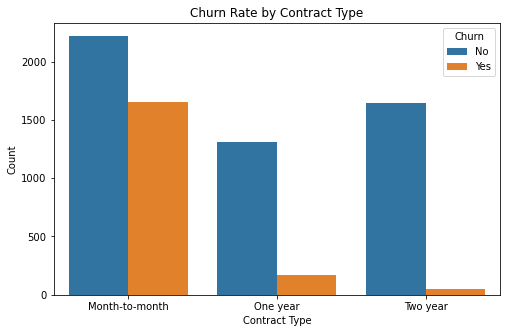

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

from above countplot we can see that in monthly contract customer are more likely to churn and  rest are having low churn rate.

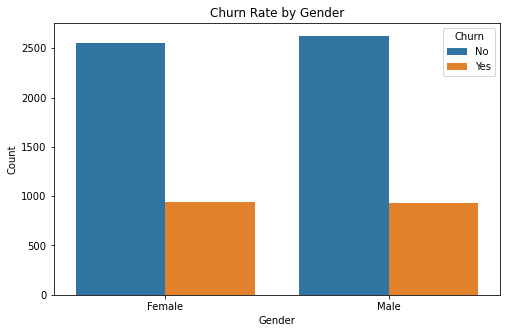

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# from above we can see that churn rate of both male and female customer are similer

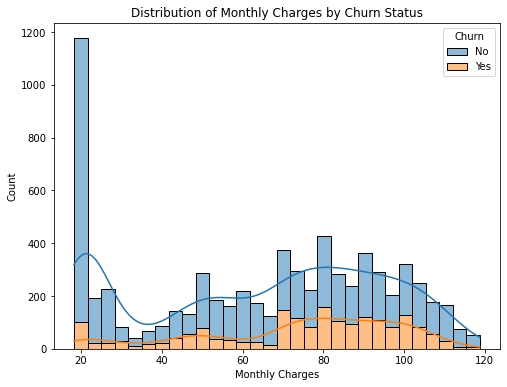

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(df, x='MonthlyCharges', hue='Churn', bins=30, kde=True, multiple='stack')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.show()


# from above histogram we can see that the churn rate is maximum between the range 60 to  100 and above

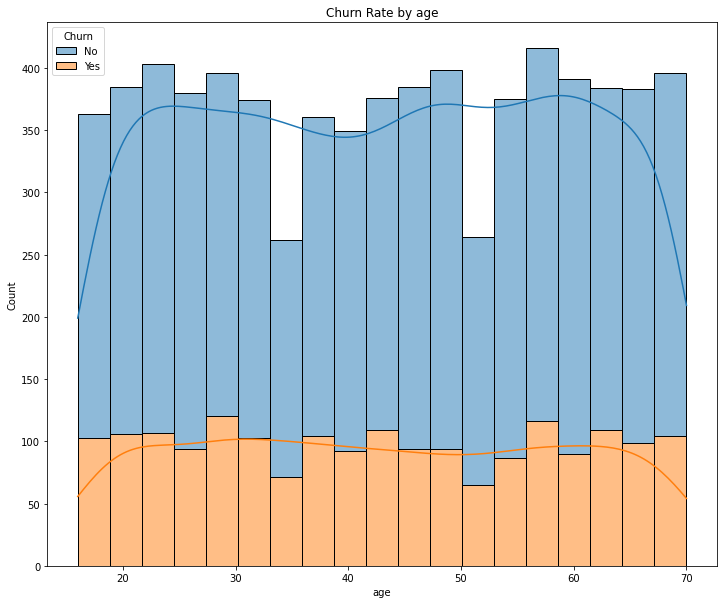

In [29]:
plt.figure(figsize=(12,10))
sns.histplot(data=df, x='age', hue='Churn',kde=True,multiple='stack')
plt.title('Churn Rate by age')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

# in above histplot we get a glance of agewise churn distribution

 this visualization helps in understanding the relationship between customer age and churn rate,
    providing valuable insights for customer retention strategies and business decision-making.






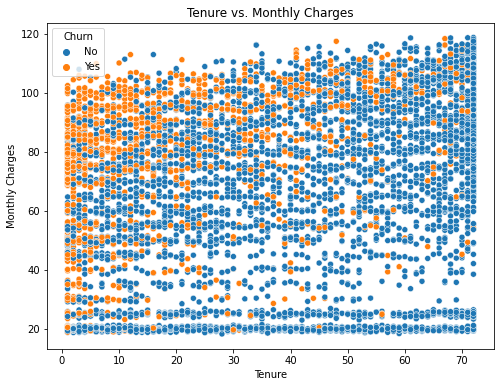

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
plt.title('Tenure vs. Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

# in above scatterplot we get a glance of churn rate according to monthly charges and tenure, we get to see that when monthly charges get above 60 initially the churn rate is incresed,but as the tenure increases the churn rate significantly decreases.

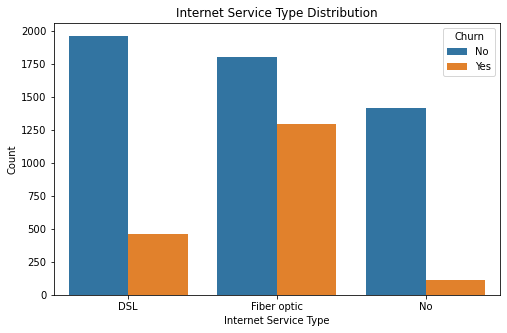

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService',hue="Churn")
plt.title('Internet Service Type Distribution')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

In [32]:
df.corr()

,age,tenure,MonthlyCharges,TotalCharges
age,1.000000,0.008098,-0.015318,-0.007537
tenure,0.008098,1.000000,0.245894,0.825079
MonthlyCharges,-0.015318,0.245894,1.000000,0.647557
TotalCharges,-0.007537,0.825079,0.647557,1.000000


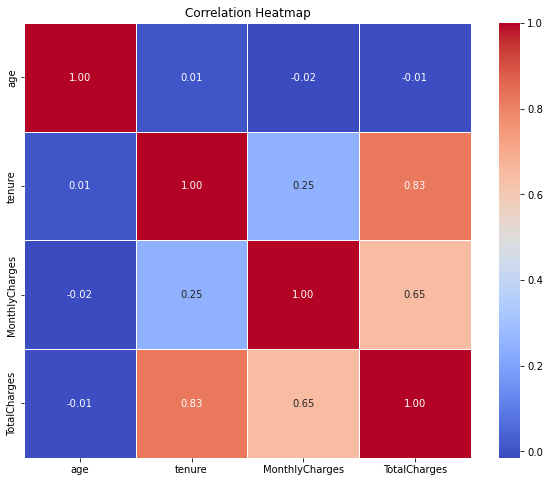

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Insight: By examining this heatmap, we can identify any significant correlations between numerical variables such 
    as age, tenure, monthly charges, and total charges. It helps in understanding the relationships between different
    variables in the dataset.

# Separting Numeric and category Data

In [34]:
df_num=df.select_dtypes(['int','float'])
df_num

,age,tenure,MonthlyCharges,TotalCharges
0,60,1,29.85,29.85
1,52,34,56.95,1889.50
2,48,2,53.85,108.15
3,41,45,42.30,1840.75
4,56,2,70.70,151.65
...,...,...,...,...
7036,51,24,84.80,1990.50
7037,65,72,103.20,7362.90
7038,63,11,29.60,346.45
7039,47,4,74.40,306.60


In [35]:
df_cat=df.select_dtypes(['object'])
df_cat

,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,Churn
0,Female,No,No phone service,DSL,No,Yes,No,No,No,Month-to-month,No
1,Male,Yes,No,DSL,Yes,No,Yes,No,No,One year,No
2,Male,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes
3,Male,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No
4,Female,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7036,Male,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,No
7037,Female,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,One year,No
7038,Female,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,No
7039,Male,Yes,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes


# Using Label Encoder for converting category data into numeric

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

In [38]:
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])
df_cat

,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,Churn
0,0,0,1,0,0,2,0,0,0,0,0
1,1,1,0,0,2,0,2,0,0,1,0
2,1,1,0,0,2,2,0,0,0,0,1
3,1,0,1,0,2,0,2,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7036,1,1,2,0,2,0,2,2,2,1,0
7037,0,1,2,1,0,2,2,2,2,1,0
7038,0,0,1,0,2,0,0,0,0,0,0
7039,1,1,2,1,0,0,0,0,0,0,1


# Features Scaling

In [93]:
from sklearn.preprocessing import StandardScaler

In [40]:
sc=StandardScaler()

In [41]:
x_scaled=sc.fit_transform(df_num)
x_scaled

array([[ 1.05795591, -1.27853681, -1.16281315, -0.99498275],
       [ 0.55503981,  0.06575276, -0.25874384, -0.17392912],
       [ 0.30358176, -1.23780076, -0.36216137, -0.96041254],
       ...,
       [ 1.24654945, -0.87117633, -1.17115328, -0.85520076],
       [ 0.24071725, -1.15632866,  0.32339672, -0.87279493],
       [ 0.42931078,  1.36930628,  1.36591207,  2.01375175]])

In [42]:
df_scaled = pd.DataFrame(data=x_scaled, columns=df_num.columns)
print(df_scaled)


           age    tenure  MonthlyCharges  TotalCharges
0     1.057956 -1.278537       -1.162813     -0.994983
1     0.555040  0.065753       -0.258744     -0.173929
2     0.303582 -1.237801       -0.362161     -0.960413
3    -0.136470  0.513849       -0.747475     -0.195453
4     0.806498 -1.237801        0.199963     -0.941207
...        ...       ...             ...           ...
7036  0.492175 -0.341608        0.670346     -0.129337
7037  1.372278  1.613723        1.284179      2.242630
7038  1.246549 -0.871176       -1.171153     -0.855201
7039  0.240717 -1.156329        0.323397     -0.872795
7040  0.429311  1.369306        1.365912      2.013752

[7041 rows x 4 columns]


# Concatenate Numerical and Categorical Columns

In [43]:
df_new=pd.concat([df_scaled,df_cat],axis=1)
df_new

,age,tenure,MonthlyCharges,TotalCharges,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,Churn
0,1.057956,-1.278537,-1.162813,-0.994983,0,0,1,0,0,2,0,0,0,0,0
1,0.555040,0.065753,-0.258744,-0.173929,1,1,0,0,2,0,2,0,0,1,0
2,0.303582,-1.237801,-0.362161,-0.960413,1,1,0,0,2,2,0,0,0,0,1
3,-0.136470,0.513849,-0.747475,-0.195453,1,0,1,0,2,0,2,0,0,1,0
4,0.806498,-1.237801,0.199963,-0.941207,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,0.492175,-0.341608,0.670346,-0.129337,1,1,2,0,2,0,2,2,2,1,0
7037,1.372278,1.613723,1.284179,2.242630,0,1,2,1,0,2,2,2,2,1,0
7038,1.246549,-0.871176,-1.171153,-0.855201,0,0,1,0,2,0,0,0,0,0,0
7039,0.240717,-1.156329,0.323397,-0.872795,1,1,2,1,0,0,0,0,0,0,1


# Splitting Data into X and Y

In [44]:
x=df_new.drop('Churn',axis=1)
x

,age,tenure,MonthlyCharges,TotalCharges,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract
0,1.057956,-1.278537,-1.162813,-0.994983,0,0,1,0,0,2,0,0,0,0
1,0.555040,0.065753,-0.258744,-0.173929,1,1,0,0,2,0,2,0,0,1
2,0.303582,-1.237801,-0.362161,-0.960413,1,1,0,0,2,2,0,0,0,0
3,-0.136470,0.513849,-0.747475,-0.195453,1,0,1,0,2,0,2,0,0,1
4,0.806498,-1.237801,0.199963,-0.941207,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,0.492175,-0.341608,0.670346,-0.129337,1,1,2,0,2,0,2,2,2,1
7037,1.372278,1.613723,1.284179,2.242630,0,1,2,1,0,2,2,2,2,1
7038,1.246549,-0.871176,-1.171153,-0.855201,0,0,1,0,2,0,0,0,0,0
7039,0.240717,-1.156329,0.323397,-0.872795,1,1,2,1,0,0,0,0,0,0


In [45]:
y=df_new.iloc[:,14:15]
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7036,0
7037,0
7038,0
7039,1


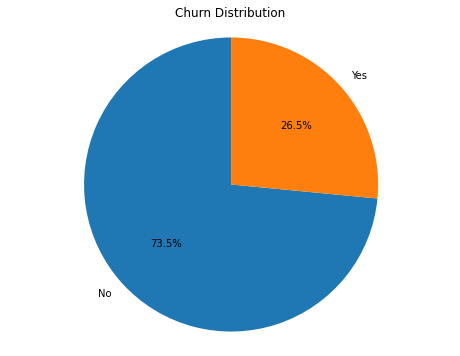

In [46]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# as we can see in above piechart the churn distribution is not balanced, so i decided to perform oversampling

# *Since the Data is imbalanced , need to do sampling (either Oversampling or Undersampling)

In [47]:
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(x,y)


In [48]:
x=x_ros
x

,age,tenure,MonthlyCharges,TotalCharges,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract
0,1.057956,-1.278537,-1.162813,-0.994983,0,0,1,0,0,2,0,0,0,0
1,0.555040,0.065753,-0.258744,-0.173929,1,1,0,0,2,0,2,0,0,1
2,0.303582,-1.237801,-0.362161,-0.960413,1,1,0,0,2,2,0,0,0,0
3,-0.136470,0.513849,-0.747475,-0.195453,1,0,1,0,2,0,2,0,0,1
4,0.806498,-1.237801,0.199963,-0.941207,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0.366446,-1.278537,0.196627,-0.976991,0,1,0,1,0,0,0,0,0,0
10344,-0.827979,0.473113,0.670346,0.697192,0,1,2,1,0,2,2,0,0,0
10345,0.492175,-0.260136,0.870509,0.034596,0,1,0,1,0,0,0,2,2,0
10346,1.372278,0.310169,-0.745807,-0.250332,1,0,1,0,2,2,2,0,0,1


In [49]:
y=y_ros
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
10343,1
10344,1
10345,1
10346,1


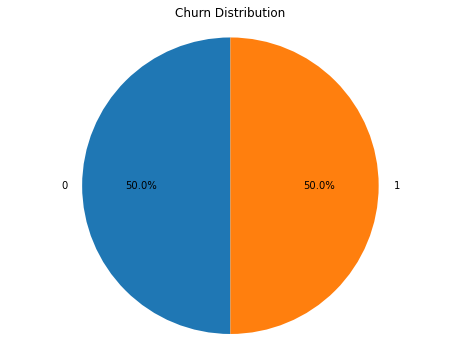

In [50]:
churn_counts = y["Churn"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# now the churn distribution is balanced

# Model Evaluation

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [53]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(random_state=42)
svm = SVC()
xgb=XGBClassifier()

In [54]:
def mymodel(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

In [55]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.78      0.71      0.75      1581
           1       0.73      0.80      0.76      1524

    accuracy                           0.75      3105
   macro avg       0.76      0.75      0.75      3105
weighted avg       0.76      0.75      0.75      3105



LogisticRegression()

In [56]:
acc_test_logreg = logreg.score(x_train,y_train)
acc_test_logreg

0.7590777302222835

In [57]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.81      0.67      0.74      1581
           1       0.71      0.84      0.77      1524

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.75      3105
weighted avg       0.76      0.76      0.75      3105



KNeighborsClassifier()

In [58]:
acc_train_knn = knn.score(x_train, y_train)
acc_train_knn

0.8377744028717382

In [59]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1581
           1       0.81      0.93      0.86      1524

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.87      0.86      0.86      3105



DecisionTreeClassifier()

In [60]:
mymodel(rf)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1581
           1       0.83      0.93      0.88      1524

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.88      0.87      0.87      3105



RandomForestClassifier(random_state=42)

In [61]:
acc_train_rf = rf.score(x_train, y_train)
acc_train_rf

0.999723871324037

In [62]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1581
           1       0.74      0.79      0.77      1524

    accuracy                           0.76      3105
   macro avg       0.76      0.76      0.76      3105
weighted avg       0.76      0.76      0.76      3105



SVC()

In [63]:
acc_train_svm = svm.score(x_train, y_train)
acc_train_svm

0.7755073864420821

In [64]:
mymodel(xgb)


              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1581
           1       0.81      0.91      0.86      1524

    accuracy                           0.85      3105
   macro avg       0.86      0.85      0.85      3105
weighted avg       0.86      0.85      0.85      3105



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
acc_train_xgb = xgb.score(x_train, y_train)
acc_train_xgb

0.9489161949468452

# Hyperparameter Tuning using GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV For Logistic Regression

In [67]:
parameters={'solver':['poly','liblinear','lbfgs','saga','sag','newton-cg'],
            'penalty':['none','l1','l2','elasticnet'],'C':[100,10,1,0.1,0.01]}
gs=GridSearchCV(logreg,parameters,verbose=3)

In [68]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 2/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 3/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 4/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 5/5] END ....C=100, penalty=none, solver=poly;, score=nan total time=   0.0s
[CV 1/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END .C=100, penalty=none, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 2/5] END .C=100, penalty=none, solver

[CV 1/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 2/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.764 total time=   0.0s
[CV 3/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.759 total time=   0.0s
[CV 4/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.747 total time=   0.0s
[CV 5/5] END ..C=10, penalty=none, solver=lbfgs;, score=0.765 total time=   0.0s
[CV 1/5] END ...C=10, penalty=none, solver=saga;, score=0.756 total time=   0.0s
[CV 2/5] END ...C=10, penalty=none, solver=saga;, score=0.764 total time=   0.0s
[CV 3/5] END ...C=10, penalty=none, solver=saga;, score=0.759 total time=   0.0s
[CV 4/5] END ...C=10, penalty=none, solver=saga;, score=0.747 total time=   0.0s
[CV 5/5] END ...C=10, penalty=none, solver=saga;, score=0.765 total time=   0.0s
[CV 1/5] END ....C=10, penalty=none, solver=sag;, score=0.756 total time=   0.0s
[CV 2/5] END ....C=10, penalty=none, solver=sag;, score=0.764 total time=   0.0s
[CV 3/5] END ....C=10, penal

[CV 1/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.756 total time=   0.0s
[CV 2/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.764 total time=   0.0s
[CV 3/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.759 total time=   0.0s
[CV 4/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.747 total time=   0.0s
[CV 5/5] END ...C=1, penalty=none, solver=lbfgs;, score=0.765 total time=   0.0s
[CV 1/5] END ....C=1, penalty=none, solver=saga;, score=0.756 total time=   0.0s
[CV 2/5] END ....C=1, penalty=none, solver=saga;, score=0.764 total time=   0.0s
[CV 3/5] END ....C=1, penalty=none, solver=saga;, score=0.759 total time=   0.0s
[CV 4/5] END ....C=1, penalty=none, solver=saga;, score=0.747 total time=   0.0s
[CV 5/5] END ....C=1, penalty=none, solver=saga;, score=0.765 total time=   0.0s
[CV 1/5] END .....C=1, penalty=none, solver=sag;, score=0.756 total time=   0.0s
[CV 2/5] END .....C=1, penalty=none, solver=sag;, score=0.764 total time=   0.0s
[CV 3/5] END .....C=1, penal

[CV 3/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.759 total time=   0.0s
[CV 4/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.747 total time=   0.0s
[CV 5/5] END .C=0.1, penalty=none, solver=lbfgs;, score=0.765 total time=   0.0s
[CV 1/5] END ..C=0.1, penalty=none, solver=saga;, score=0.756 total time=   0.0s
[CV 2/5] END ..C=0.1, penalty=none, solver=saga;, score=0.764 total time=   0.0s
[CV 3/5] END ..C=0.1, penalty=none, solver=saga;, score=0.759 total time=   0.0s
[CV 4/5] END ..C=0.1, penalty=none, solver=saga;, score=0.747 total time=   0.0s
[CV 5/5] END ..C=0.1, penalty=none, solver=saga;, score=0.765 total time=   0.0s
[CV 1/5] END ...C=0.1, penalty=none, solver=sag;, score=0.756 total time=   0.0s
[CV 2/5] END ...C=0.1, penalty=none, solver=sag;, score=0.764 total time=   0.0s
[CV 3/5] END ...C=0.1, penalty=none, solver=sag;, score=0.759 total time=   0.0s
[CV 4/5] END ...C=0.1, penalty=none, solver=sag;, score=0.747 total time=   0.0s
[CV 5/5] END ...C=0.1, penal

[CV 3/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.759 total time=   0.0s
[CV 4/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.747 total time=   0.0s
[CV 5/5] END C=0.01, penalty=none, solver=lbfgs;, score=0.765 total time=   0.0s
[CV 1/5] END .C=0.01, penalty=none, solver=saga;, score=0.756 total time=   0.0s
[CV 2/5] END .C=0.01, penalty=none, solver=saga;, score=0.764 total time=   0.0s
[CV 3/5] END .C=0.01, penalty=none, solver=saga;, score=0.759 total time=   0.0s
[CV 4/5] END .C=0.01, penalty=none, solver=saga;, score=0.747 total time=   0.0s
[CV 5/5] END .C=0.01, penalty=none, solver=saga;, score=0.765 total time=   0.0s
[CV 1/5] END ..C=0.01, penalty=none, solver=sag;, score=0.756 total time=   0.0s
[CV 2/5] END ..C=0.01, penalty=none, solver=sag;, score=0.764 total time=   0.0s
[CV 3/5] END ..C=0.01, penalty=none, solver=sag;, score=0.759 total time=   0.0s
[CV 4/5] END ..C=0.01, penalty=none, solver=sag;, score=0.747 total time=   0.0s
[CV 5/5] END ..C=0.01, penal

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['poly', 'liblinear', 'lbfgs', 'saga', 'sag',
                                    'newton-cg']},
             verbose=3)

In [69]:
gs.best_params_

{'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}

In [70]:
logreg=LogisticRegression(C=100,penalty='none',solver='lbfgs')
                          
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.75      1581
           1       0.73      0.80      0.76      1524

    accuracy                           0.75      3105
   macro avg       0.76      0.75      0.75      3105
weighted avg       0.76      0.75      0.75      3105



In [71]:
acc_logreggs=accuracy_score(y_test,y_pred)
acc_logreggs

0.7529790660225443

# GridSearchCV For Decision Tree

In [72]:
parameters={'max_depth':['none',10,20,30],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4]}
gs=GridSearchCV(dt,parameters,verbose=3)

In [73]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_samples_leaf=1, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=none, min_samples_leaf=1, min_samples_split=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=none, min_sampl

[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.785 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.786 total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.771 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.789 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.782 total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.784 total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.782 total time=   0.0s
[CV 1/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.823 total time=   0.0s
[CV 2/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.831 total time=   0.0s
[CV 3/5] END max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.816 total time=   

[CV 1/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.773 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.767 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.783 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.791 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=4, min_samples_split=2;, score=0.797 total time=   0.0s
[CV 1/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.769 total time=   0.0s
[CV 2/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.774 total time=   0.0s
[CV 3/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.780 total time=   0.0s
[CV 4/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.792 total time=   0.0s
[CV 5/5] END max_depth=30, min_samples_leaf=4, min_samples_split=5;, score=0.796 total time=   0.0s


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': ['none', 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [74]:
gs.best_params_

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [92]:
dt=DecisionTreeClassifier(max_depth=30,min_samples_leaf=1,min_samples_split=2)
                          
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1581
           1       0.81      0.92      0.86      1524

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.85      3105



In [91]:
acc_dtgs=accuracy_score(y_test,y_pred)
acc_dtgs

0.8608695652173913

# GridSearchCV For SVC

In [77]:
param_grid = {'C':[0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel':['rbf','Polynomial']}

svc_grid = GridSearchCV(svm, param_grid ,verbose=3)

In [78]:
svc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time=   4.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.795 total time=   4.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.799 total time=   4.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.792 total time=   4.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.785 total time=   4.3s
[CV 1/5] END ...C=0.1, gamma=1, kernel=Polynomial;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=1, kernel=Polynomial;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=1, kernel=Polynomial;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=1, kernel=Polynomial;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=1, kernel=Polynomial;, score=nan total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.753 total time=   3.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.761 total time=   3.6s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.756 total time=   3.9s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.741 total time=   3.3s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.749 total time=   3.5s
[CV 1/5] END .C=10, gamma=0.01, kernel=Polynomial;, score=nan total time=   0.0s
[CV 2/5] END .C=10, gamma=0.01, kernel=Polynomial;, score=nan total time=   0.0s
[CV 3/5] END .C=10, gamma=0.01, kernel=Polynomial;, score=nan total time=   0.0s
[CV 4/5] END .C=10, gamma=0.01, kernel=Polynomial;, score=nan total time=   0.0s
[CV 5/5] END .C=10, gamma=0.01, kernel=Polynomial;, score=nan total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.754 total time=   3.1s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.754 total time=   3.3s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.754 total time=   3.7s
[CV 4/5] END .....C=10, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'Polynomial']},
             verbose=3)

In [79]:
svc_grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [80]:
svc_cv = SVC(C=100,gamma=1,kernel='rbf')
                          
svc_cv.fit(x_train,y_train)
y_pred = svc_cv.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1581
           1       0.81      0.91      0.86      1524

    accuracy                           0.85      3105
   macro avg       0.86      0.85      0.85      3105
weighted avg       0.86      0.85      0.85      3105



In [81]:
acc_svccv=accuracy_score(y_test,y_pred)
acc_svccv

0.8531400966183574

# GridSearchCV For KNN

In [82]:
param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance'],
              'metric' : ['minkowski','euclidean','manhattan']}
knn_grid = GridSearchCV(knn, param_grid ,verbose=3)

In [83]:
knn_grid.fit(x_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.825 total time=   0.1s
[CV 2/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.827 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.829 total time=   0.1s
[CV 4/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.834 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=1, weights=uniform;, score=0.828 total time=   0.1s
[CV 1/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.825 total time=   0.0s
[CV 2/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.827 total time=   0.0s
[CV 3/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.829 total time=   0.0s
[CV 4/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.834 total time=   0.0s
[CV 5/5] END metric=minkowski, n_neighbors=1, weights=distance;, score=0.828 t

[CV 2/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.814 total time=   0.1s
[CV 3/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.816 total time=   0.1s
[CV 4/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.812 total time=   0.1s
[CV 5/5] END metric=minkowski, n_neighbors=9, weights=distance;, score=0.814 total time=   0.1s
[CV 1/5] END metric=minkowski, n_neighbors=10, weights=uniform;, score=0.746 total time=   0.1s
[CV 2/5] END metric=minkowski, n_neighbors=10, weights=uniform;, score=0.755 total time=   0.2s
[CV 3/5] END metric=minkowski, n_neighbors=10, weights=uniform;, score=0.738 total time=   0.1s
[CV 4/5] END metric=minkowski, n_neighbors=10, weights=uniform;, score=0.726 total time=   0.1s
[CV 5/5] END metric=minkowski, n_neighbors=10, weights=uniform;, score=0.733 total time=   0.1s
[CV 1/5] END metric=minkowski, n_neighbors=10, weights=distance;, score=0.812 total time=   0.1s
[CV 2/5] END metric=minkowski, n_neighb

[CV 2/5] END metric=minkowski, n_neighbors=18, weights=uniform;, score=0.749 total time=   0.2s
[CV 3/5] END metric=minkowski, n_neighbors=18, weights=uniform;, score=0.747 total time=   0.2s
[CV 4/5] END metric=minkowski, n_neighbors=18, weights=uniform;, score=0.723 total time=   0.2s
[CV 5/5] END metric=minkowski, n_neighbors=18, weights=uniform;, score=0.742 total time=   0.2s
[CV 1/5] END metric=minkowski, n_neighbors=18, weights=distance;, score=0.816 total time=   0.1s
[CV 2/5] END metric=minkowski, n_neighbors=18, weights=distance;, score=0.816 total time=   0.1s
[CV 3/5] END metric=minkowski, n_neighbors=18, weights=distance;, score=0.817 total time=   0.1s
[CV 4/5] END metric=minkowski, n_neighbors=18, weights=distance;, score=0.809 total time=   0.1s
[CV 5/5] END metric=minkowski, n_neighbors=18, weights=distance;, score=0.813 total time=   0.1s
[CV 1/5] END metric=minkowski, n_neighbors=19, weights=uniform;, score=0.744 total time=   0.2s
[CV 2/5] END metric=minkowski, n_ne

[CV 2/5] END metric=minkowski, n_neighbors=26, weights=distance;, score=0.820 total time=   0.1s
[CV 3/5] END metric=minkowski, n_neighbors=26, weights=distance;, score=0.823 total time=   0.1s
[CV 4/5] END metric=minkowski, n_neighbors=26, weights=distance;, score=0.801 total time=   0.2s
[CV 5/5] END metric=minkowski, n_neighbors=26, weights=distance;, score=0.814 total time=   0.1s
[CV 1/5] END metric=minkowski, n_neighbors=27, weights=uniform;, score=0.745 total time=   0.2s
[CV 2/5] END metric=minkowski, n_neighbors=27, weights=uniform;, score=0.752 total time=   0.2s
[CV 3/5] END metric=minkowski, n_neighbors=27, weights=uniform;, score=0.746 total time=   0.2s
[CV 4/5] END metric=minkowski, n_neighbors=27, weights=uniform;, score=0.718 total time=   0.2s
[CV 5/5] END metric=minkowski, n_neighbors=27, weights=uniform;, score=0.739 total time=   0.2s
[CV 1/5] END metric=minkowski, n_neighbors=27, weights=distance;, score=0.816 total time=   0.1s
[CV 2/5] END metric=minkowski, n_ne

[CV 4/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.737 total time=   0.1s
[CV 5/5] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.748 total time=   0.1s
[CV 1/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.807 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.805 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.807 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.811 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.802 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=6, weights=uniform;, score=0.740 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=6, weights=uniform;, score=0.761 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=6, weights=uniform;, score=0.741 total time=   0.1s
[CV 4/5] END metric=euclidean, n_neighbors=6,

[CV 1/5] END metric=euclidean, n_neighbors=14, weights=uniform;, score=0.747 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=14, weights=uniform;, score=0.756 total time=   0.2s
[CV 3/5] END metric=euclidean, n_neighbors=14, weights=uniform;, score=0.745 total time=   0.2s
[CV 4/5] END metric=euclidean, n_neighbors=14, weights=uniform;, score=0.725 total time=   0.2s
[CV 5/5] END metric=euclidean, n_neighbors=14, weights=uniform;, score=0.735 total time=   0.1s
[CV 1/5] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.812 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.814 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.814 total time=   0.1s
[CV 4/5] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.807 total time=   0.1s
[CV 5/5] END metric=euclidean, n_neighbors=14, weights=distance;, score=0.809 total time=   0.1s
[CV 1/5] END metric=euclidean, n_ne

[CV 1/5] END metric=euclidean, n_neighbors=22, weights=distance;, score=0.812 total time=   0.1s
[CV 2/5] END metric=euclidean, n_neighbors=22, weights=distance;, score=0.816 total time=   0.1s
[CV 3/5] END metric=euclidean, n_neighbors=22, weights=distance;, score=0.818 total time=   0.1s
[CV 4/5] END metric=euclidean, n_neighbors=22, weights=distance;, score=0.809 total time=   0.1s
[CV 5/5] END metric=euclidean, n_neighbors=22, weights=distance;, score=0.813 total time=   0.2s
[CV 1/5] END metric=euclidean, n_neighbors=23, weights=uniform;, score=0.749 total time=   0.2s
[CV 2/5] END metric=euclidean, n_neighbors=23, weights=uniform;, score=0.752 total time=   0.2s
[CV 3/5] END metric=euclidean, n_neighbors=23, weights=uniform;, score=0.746 total time=   0.2s
[CV 4/5] END metric=euclidean, n_neighbors=23, weights=uniform;, score=0.724 total time=   0.2s
[CV 5/5] END metric=euclidean, n_neighbors=23, weights=uniform;, score=0.738 total time=   0.2s
[CV 1/5] END metric=euclidean, n_ne

[CV 2/5] END metric=manhattan, n_neighbors=1, weights=uniform;, score=0.827 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=1, weights=uniform;, score=0.834 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=1, weights=uniform;, score=0.828 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=1, weights=uniform;, score=0.820 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.828 total time=   0.0s
[CV 2/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.827 total time=   0.0s
[CV 3/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.834 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.828 total time=   0.0s
[CV 5/5] END metric=manhattan, n_neighbors=1, weights=distance;, score=0.820 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=2, weights=uniform;, score=0.761 total time=   0.1s
[CV 2/5] END metric=manhattan, n_neighbors=2,

[CV 3/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.820 total time=   0.0s
[CV 4/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.809 total time=   0.1s
[CV 5/5] END metric=manhattan, n_neighbors=9, weights=distance;, score=0.805 total time=   0.0s
[CV 1/5] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.748 total time=   0.1s
[CV 2/5] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.754 total time=   0.1s
[CV 3/5] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.747 total time=   0.1s
[CV 4/5] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.743 total time=   0.1s
[CV 5/5] END metric=manhattan, n_neighbors=10, weights=uniform;, score=0.743 total time=   0.1s
[CV 1/5] END metric=manhattan, n_neighbors=10, weights=distance;, score=0.814 total time=   0.1s
[CV 2/5] END metric=manhattan, n_neighbors=10, weights=distance;, score=0.812 total time=   0.1s
[CV 3/5] END metric=manhattan, n_neigh

[CV 3/5] END metric=manhattan, n_neighbors=18, weights=uniform;, score=0.763 total time=   0.1s
[CV 4/5] END metric=manhattan, n_neighbors=18, weights=uniform;, score=0.732 total time=   0.1s
[CV 5/5] END metric=manhattan, n_neighbors=18, weights=uniform;, score=0.740 total time=   0.1s
[CV 1/5] END metric=manhattan, n_neighbors=18, weights=distance;, score=0.815 total time=   0.1s
[CV 2/5] END metric=manhattan, n_neighbors=18, weights=distance;, score=0.814 total time=   0.1s
[CV 3/5] END metric=manhattan, n_neighbors=18, weights=distance;, score=0.823 total time=   0.1s
[CV 4/5] END metric=manhattan, n_neighbors=18, weights=distance;, score=0.809 total time=   0.1s
[CV 5/5] END metric=manhattan, n_neighbors=18, weights=distance;, score=0.815 total time=   0.1s
[CV 1/5] END metric=manhattan, n_neighbors=19, weights=uniform;, score=0.748 total time=   0.1s
[CV 2/5] END metric=manhattan, n_neighbors=19, weights=uniform;, score=0.754 total time=   0.1s
[CV 3/5] END metric=manhattan, n_ne

[CV 3/5] END metric=manhattan, n_neighbors=26, weights=distance;, score=0.821 total time=   0.1s
[CV 4/5] END metric=manhattan, n_neighbors=26, weights=distance;, score=0.809 total time=   0.1s
[CV 5/5] END metric=manhattan, n_neighbors=26, weights=distance;, score=0.814 total time=   0.2s
[CV 1/5] END metric=manhattan, n_neighbors=27, weights=uniform;, score=0.751 total time=   0.2s
[CV 2/5] END metric=manhattan, n_neighbors=27, weights=uniform;, score=0.751 total time=   0.2s
[CV 3/5] END metric=manhattan, n_neighbors=27, weights=uniform;, score=0.756 total time=   0.2s
[CV 4/5] END metric=manhattan, n_neighbors=27, weights=uniform;, score=0.733 total time=   0.2s
[CV 5/5] END metric=manhattan, n_neighbors=27, weights=uniform;, score=0.740 total time=   0.2s
[CV 1/5] END metric=manhattan, n_neighbors=27, weights=distance;, score=0.816 total time=   0.1s
[CV 2/5] END metric=manhattan, n_neighbors=27, weights=distance;, score=0.816 total time=   0.1s
[CV 3/5] END metric=manhattan, n_ne

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [84]:
knn_para = knn_grid.best_params_
print(knn_para)

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}


In [85]:
knn=KNeighborsClassifier(metric= 'minkowski', n_neighbors=1, weights= 'uniform')
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1581
           1       0.80      0.92      0.86      1524

    accuracy                           0.85      3105
   macro avg       0.86      0.85      0.85      3105
weighted avg       0.86      0.85      0.85      3105



In [86]:
acc_train_knn = knn.score(x_train, y_train)
acc_train_knn

0.999723871324037

In [87]:
acc_knngs=accuracy_score(y_test,y_pred)
acc_knngs

0.851207729468599

In [88]:
acc_table={"models":["LogisticRegression","LogisticRegression_GS","DecisionTreeClassifier","DecisionTreeClassifier_GS","RandomForestClassifier","SVC","SVC_GS","xgboost","KNN","KNN_GS"],"Accuracy":[0.75,0.75,0.86,0.86,0.87,0.76,0.85,0.85,0.76,0.85]}
acc_table

{'models': ['LogisticRegression',
  'LogisticRegression_GS',
  'DecisionTreeClassifier',
  'DecisionTreeClassifier_GS',
  'RandomForestClassifier',
  'SVC',
  'SVC_GS',
  'xgboost',
  'KNN',
  'KNN_GS'],
 'Accuracy': [0.75, 0.75, 0.86, 0.86, 0.87, 0.76, 0.85, 0.85, 0.76, 0.85]}

In [89]:
df_acc=pd.DataFrame(acc_table,index=[1,2,3,4,5,6,7,8,9,10])
df_acc

,models,Accuracy
1,LogisticRegression,0.75
2,LogisticRegression_GS,0.75
3,DecisionTreeClassifier,0.86
4,DecisionTreeClassifier_GS,0.86
5,RandomForestClassifier,0.87
6,SVC,0.76
7,SVC_GS,0.85
8,xgboost,0.85
9,KNN,0.76
10,KNN_GS,0.85


conclusion:Based on the analysis conducted using logistic regression, K-Nearest Neighbors (KNN), decision tree,
    Support Vector Classifier (SVC), and Random Forest algorithms for churn prediction, it has been observed that
    Random Forest achieved the highest accuracy among these models.
    In conclusion, based on the analysis conducted, the Random Forest algorithm appears to be the most 
    suitable model for predicting churn in this scenario.